<a href="https://colab.research.google.com/github/lavanyaasehgal/IntelliShorts/blob/main/NLP_summarizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [2]:
!pip install Flask -q
!pip install contractions -q
!pip install -U transformers -q
!pip install --upgrade transformers
!pip install -U accelerate -q
!pip install keras_nlp -q
!pip install datasets -q
!pip install huggingface-hub -q
!pip install rouge-score -q
!pip install sentencepiece -q
!pip install bert-for-tf2 -q
!pip install bert-tensorflow -q
!pip install bert-extractive-summarizer -q
!pip install spacy -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 49.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 94.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 88.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.1/590.1 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 86.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [4]:
import string, re, nltk
nltk.download("all")
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.translate.bleu_score import sentence_bleu

!python -m spacy download en_core_web_sm, en_core_web_md

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from string import punctuation
from sklearn.metrics.pairwise import cosine_similarity

import tensorflow as tf
from tensorflow import keras
from keras import backend as K
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed,Dropout
from keras.optimizers import AdamW
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

import accelerate
import contractions
import torch
import gensim
from bs4 import BeautifulSoup
from datasets import load_metric, load_dataset

import transformers
from transformers import T5ForConditionalGeneration, T5Tokenizer,AutoTokenizer
from transformers import TFAutoModelForSeq2SeqLM, AutoModelForSeq2SeqLM,DataCollatorForSeq2Seq, Seq2SeqTrainingArguments, Seq2SeqTrainer
from transformers import BertTokenizer
from summarizer import Summarizer
# from summarizer.text_processors.coreference_handler import CoreferenceHandler

import sentencepiece as spm


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

2023-11-05 22:33:02.417380: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-05 22:33:02.417444: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-05 22:33:02.417484: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-05 22:33:02.426322: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-05 22:33:03.585109: W tensorflow/compiler/

In [5]:
# !pip install gnews -q
# !pip install GoogleNews -q
# !pip install fake_useragent -q
# !pip install newspaper3k -q
# !pip install newsapi-python -q
# !pip install pycountry -q
# !pip install gnewsclient -q
# !pip install --upgrade pip
# !pip install --upgrade setuptools
# !pip uninstall spacy
# !pip install neuralcoref
# !pip install pytorch-pretrained-bert -q
# !sudo apt-get install python3.7-dev
# import pytorch
# from pytorch_pretrained_bert.modeling import BertPreTrainedModel,BertForSummarization, BertTokenizer, BertModel
# from pytorch_pretrained_bert import
# !python -m spacy download en_core_web_sm
# !pip install --upgrade pip
# !pip install Cmake

In [6]:
# !git clone https://github.com/huggingface/neuralcoref.git
# !pip install spacy==2.1.0
# !python -m spacy download en
# !pip show spacy
# !python -m spacy download en_core_web_sm, en_core_web_md

# import spacy
# # nlp = spacy.load('en')

# %cd neuralcoref

# !pip install -r requirements.txt
# !pip install -e .

# import neuralcoref
# neuralcoref.add_to_pipe(nlp)

# Importing data

In [ ]:
# ai=pd.read_csv('/content/drive/MyDrive/nlp data/ai_articles.csv')
# ml=pd.read_csv('/content/drive/MyDrive/nlp data/ml_articles.csv')
# explainable_ai=pd.read_csv('/content/drive/MyDrive/nlp data/explainable_articles.csv')
# deep_learning=pd.read_csv('/content/drive/MyDrive/nlp data/dl_articles.csv')
# data_mining=pd.read_csv('/content/drive/MyDrive/nlp data/dm_articles.csv')
# gpt_art=pd.read_csv('/content/drive/MyDrive/nlp data/gpt_articles.csv')
# nlp=pd.read_csv('/content/drive/MyDrive/nlp data/nlp_articles.csv')
# reinforcement_learning=pd.read_csv('/content/drive/MyDrive/nlp data/rl_articles.csv')
# transfer_leaning=pd.read_csv('/content/drive/MyDrive/nlp data/transfer_articles.csv')

In [ ]:
# combined_unclean = pd.DataFrame()
# file_paths=[ai,ml,explainable_ai,deep_learning,data_mining,gpt_art,nlp,reinforcement_learning,transfer_leaning]
# # Iterate through the files and combine them
# for file in file_paths:
#     combined_unclean = combined_unclean.append(file, ignore_index=True)

# # Save the combined data to a new CSV file
# combined_unclean.to_csv('/content/drive/MyDrive/nlp data/combined_unclean.csv', index=False)

In [ ]:
# combined_unclean=pd.read_csv('/content/drive/MyDrive/nlp data/combined_unclean.csv')

# Cleaning (functions)

In [7]:
# #Regular Expression
# regexp = RegexpTokenizer("[\w']+")
# #Lowercase
# def text_lower(text):
#   text = text.lower()
#   return text
# #Remove Whitespace
# def remove_whitespace(text):
#   text = text.strip()
#   return text
# #Remove Punctuation
# def remove_punctuation(text):
#   punct = string.punctuation
#   punct = punct.replace("'","")
#   text = text.translate(str.maketrans("", "",punct))
#   return text
# #Remove HTML
# def remove_html(text):
#   html = re.compile(r'<.*?>')
#   text = html.sub(r'',text)
#   return text
# # Removing emojis
# def remove_emoji(text):
#   emoji_pattern = re.compile("["
#     u"\U0001F600-\U0001F64F"  # emoticons
#     u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#     u"\U0001F680-\U0001F6FF"  # transport & map symbols
#     u"\U0001F1E0-\U0001F1FF"  # flags
#     u"\U00002702-\U000027B0"
#     u"\U000024C2-\U0001F251"
#     "]+",flags=re.UNICODE
#   )
#   text = emoji_pattern.sub(r'',text)
#   return text
# #Remove HTML
# def remove_html(text):
#   html = re.compile(r'<.*?>')
#   text = html.sub(r'',text)
#   return text
# #Remove URLS
# def remove_http_links(text):
#   text = re.sub('http://\S+|https://\S+','',text)
#   return text
# #Convert Contractions like you're
# def convert_contractions(text):
#   text = contractions.fix(text)
#   return text
# #Remove Stopwords
# def remove_stopwords(text):
#   text = " ".join([word for word in nltk.tokenize.word_tokenize(text) if word not in stopwords.words('english')])
#   return text
# # Lemmatization
# nlp = spacy.load("en_core_web_sm", disable = ['parser', 'ner'])

# def lemmatize(text):
#   text = " ".join([token.lemma_ for token in nlp(text)])
#   return text
# #Remove Non-Alphabetic Characters
# def discard_non_alpha(text):
#   word_list_non_alpha = [word for word in regexp.tokenize(text) if word.isalpha()]
#   text = " ".join(word_list_non_alpha)
#   return text

In [8]:
# def preprocess_text(text):
#   text = text_lower(text)
#   text = remove_whitespace(text)
#   text = re.sub('\n' , '', text)
#   text = re.sub('\[.*?\]', '', text)
#   text = remove_http_links(text)
#   text = remove_punctuation(text)
#   text = remove_html(text)
#   text = remove_emoji(text)
#   text = convert_contractions(text)
#   text = remove_stopwords(text)
#   text = discard_non_alpha(text)
#   # text = lemmatize(text)

#   return text

In [9]:
# combined_data=[]
# combined_data=combined_unclean

In [10]:
# combined_data['content'] = combined_data['content'].apply(preprocess_text)

In [11]:
# combined_data.isna().sum()

In [12]:
# combined_data = combined_data.dropna(subset=['title'])

In [13]:
# combined_data.isna().sum()

In [14]:
# combined_data.to_csv('/content/drive/MyDrive/nlp data/combined_data.csv', index=False)

In [15]:
# articles_to_summ = combined_data[['title', 'content']]

In [16]:
combined_data=pd.read_csv('/content/drive/MyDrive/nlp data/combined_data.csv')

In [17]:
cnt=0
for i in combined_data['title']:
    if(len(i.split())<=15):
        cnt=cnt+1
print(cnt/len(combined_data['title']))

0.8384332925336597


In [18]:
cnt=0
for i in combined_data['content']:
    if(len(i.split())<=50):
        cnt=cnt+1
print(cnt/len(combined_data['content']))

0.042839657282741736


In [19]:
df=pd.read_csv("/content/drive/MyDrive/nlp data/combined_data.csv")

In [20]:
df=df[['keyword','content','title']]

In [21]:
df['articles_length']=df['content'].apply(lambda x:len(x.split()))
df['summaries_length']=df['title'].apply(lambda x:len(x.split()))

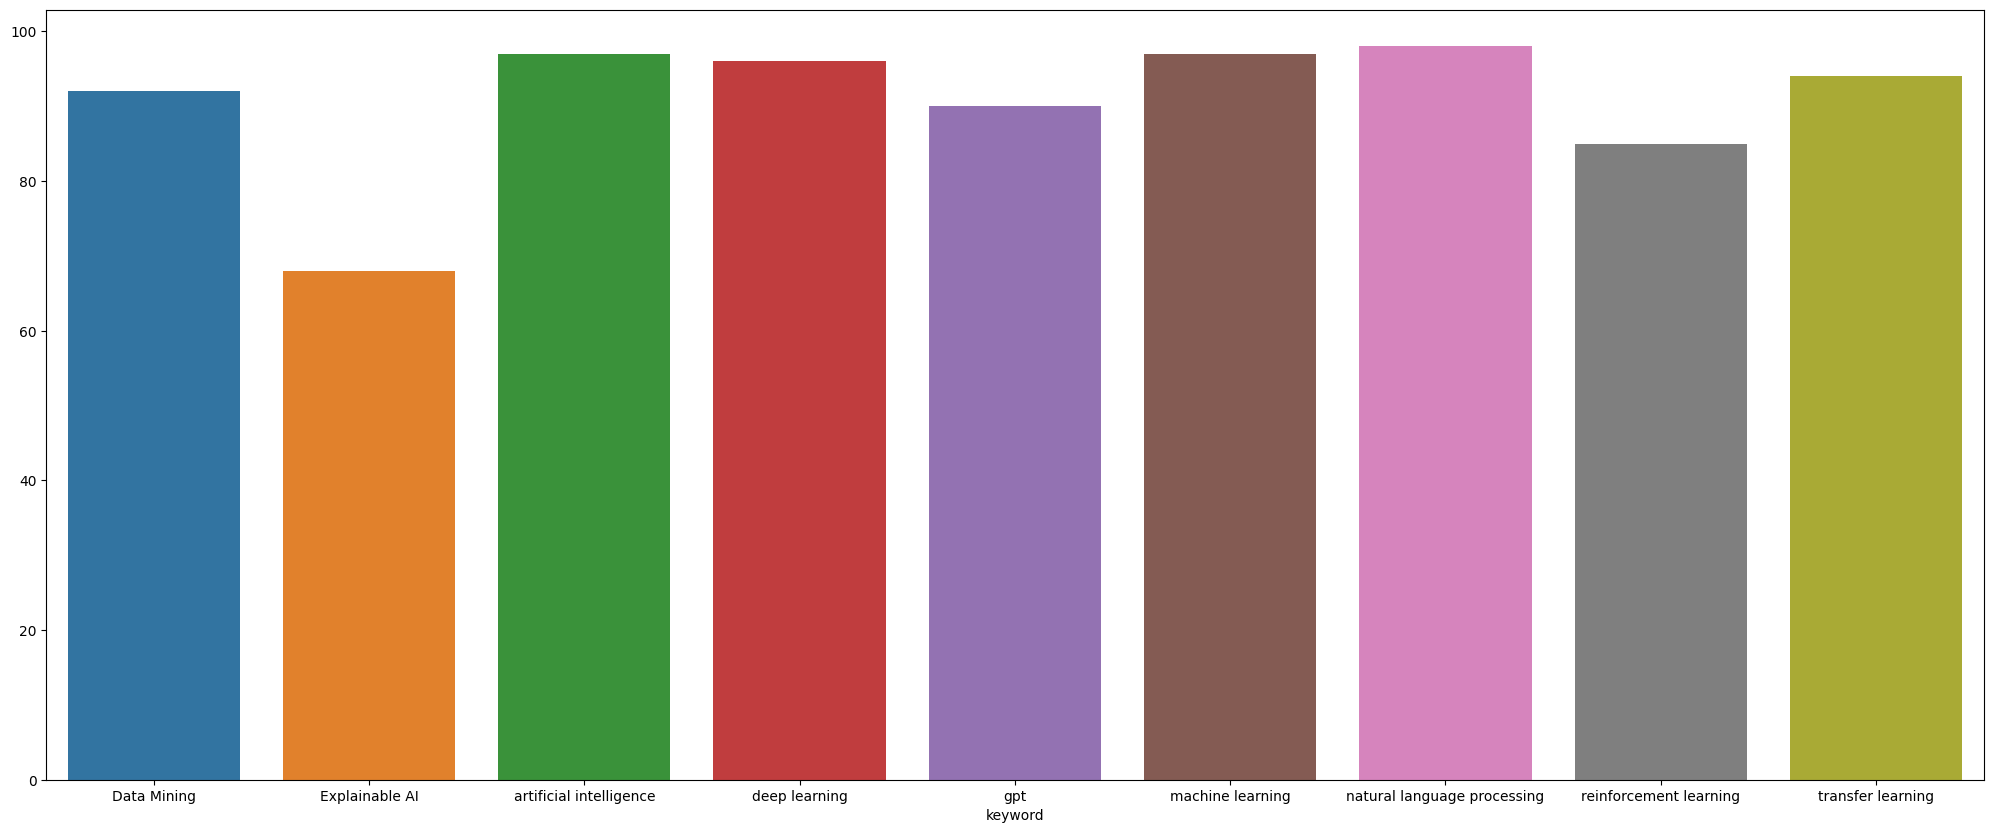

In [22]:
plt.figure(figsize=(25, 10))
category_sizes=df.groupby('keyword').size()
sns.barplot(x=category_sizes.index, y=category_sizes)
plt.show()

In [23]:
category_length=df.groupby("keyword",0).agg({"articles_length":'mean',"summaries_length":'mean'})
category_length

,articles_length,summaries_length
keyword,,
Data Mining,910.141304,12.065217
Explainable AI,1135.132353,11.294118
artificial intelligence,819.608247,10.639175
deep learning,1493.312500,10.552083
gpt,689.466667,10.900000
machine learning,1310.845361,11.113402
natural language processing,1456.959184,12.540816
reinforcement learning,1302.682353,10.682353
transfer learning,1561.010638,11.489362


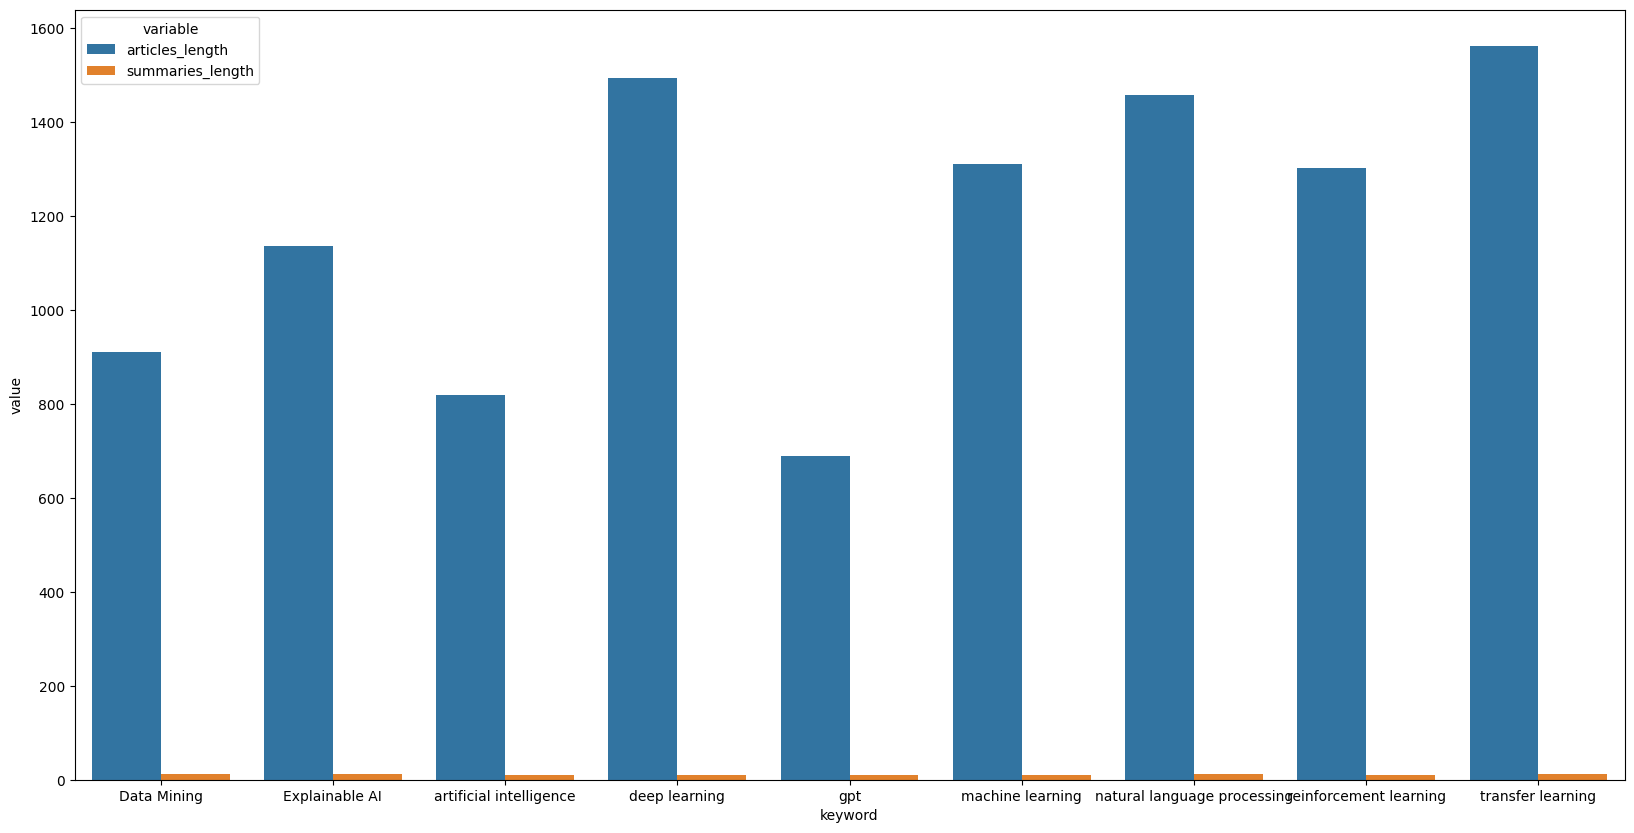

In [24]:
df_m=pd.melt(category_length,ignore_index=False)
plt.figure(figsize=(20,10))
sns.barplot(x=df_m.index,y='value',hue='variable',data=df_m)
plt.show()

Text(0.5, 1.0, 'full summary token counts')

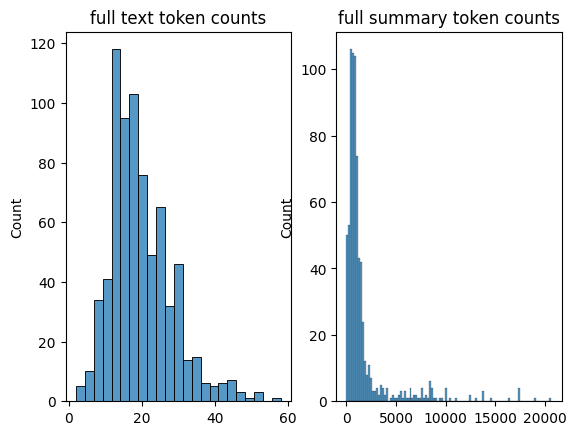

In [ ]:
fig, (ax1,ax2)=plt.subplots(1,2)
sns.histplot(text_token_counts, ax=ax1)
ax1.set_title("full text token counts")
sns.histplot(summary_token_counts, ax=ax2)
ax2.set_title("full summary token counts")


In [25]:
pd.melt(category_length,ignore_index=False).groupby('variable').mean()

,value
variable,
articles_length,1186.573179
summaries_length,11.252947


# GPU

In [ ]:
# Check for GPU availability
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available and being used")
else:
    device = torch.device("cpu")
    print("GPU is not available, using CPU instead")

GPU is available and being used


In [ ]:
torch.cuda.empty_cache()
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

# Model

In [27]:
train_data, test_data = train_test_split(combined_data, train_size=0.7, random_state=42)

In [28]:
train_data = train_data[['title', 'content']]
test_data = test_data[['title', 'content']]

In [29]:
train = train_data.reset_index(drop=True)
test = test_data.reset_index(drop=True)

In [30]:
x_tr,x_val,y_tr,y_val=train_test_split(np.array(combined_data['title']),np.array(combined_data['content']),test_size=0.2,random_state=0,shuffle=True)

# T5 YESSSSSSSSSSSSSSSSSSSSS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from huggingface_hub import notebook_login

import torch
from torch.utils.data import DataLoader, Dataset

from nltk.translate.bleu_score import sentence_bleu
from rouge_score import rouge_scorer

import transformers
from transformers import T5ForConditionalGeneration, T5Tokenizer, AdamW
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import TFAutoModelForSeq2SeqLM, AutoModelForSeq2SeqLM,DataCollatorForSeq2Seq, Seq2SeqTrainingArguments, Seq2SeqTrainer

In [ ]:
combined_data=pd.read_csv("C:\\Users\\lavan\\OneDrive\\Desktop\\nlp\\nlp_lakshya\\combined_data.csv")
combined_new=combined_data[['title', 'content']]
train_data, test_data = train_test_split(combined_new, test_size=0.5, random_state=42)
val_data, test_data = train_test_split(test_data, test_size=0.5, random_state=42)

In [ ]:
# Check for GPU availability
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available and being used")
else:
    device = torch.device("cpu")
    print("GPU is not available, using CPU instead")

GPU is available and being used


In [ ]:
# Data preprocessing
class TextSummarizationDataset(Dataset):
    def __init__(self, data, tokenizer, max_input_length, max_target_length):
        self.data = data
        self.tokenizer = tokenizer
        self.max_input_length = max_input_length
        self.max_target_length = max_target_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        content = self.data.iloc[index]['content']
        title = self.data.iloc[index]['title']

        inputs = self.tokenizer.encode_plus(
            content,
            max_length=self.max_input_length,
            padding="max_length",
            truncation=True,
            return_tensors="pt"
        )

        targets = self.tokenizer.encode_plus(
            title,
            max_length=self.max_target_length,
            padding="max_length",
            truncation=True,
            return_tensors="pt"
        )

        return {
            "input_ids": inputs["input_ids"].squeeze(),
            "attention_mask": inputs["attention_mask"].squeeze(),
            "labels": targets["input_ids"].squeeze(),
        }

In [ ]:
# Define hyperparameters
max_input_length = 300
max_target_length = 20
batch_size = 8
learning_rate = 0.002
epochs = 5

# Early stopping parameters
early_stopping_patience = 3  # Stop training if validation loss does not improve for 3 consecutive epochs
best_validation_loss = float('inf')
patience_counter = 0

model_name = "t5-small"  # You can choose a different model size
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name).to(device)

In [ ]:
def calculate_scores(model, dataloader):
    model.eval()
    total_bleu = 0
    total_rouge = 0
    num_batches = 0

    reference_texts = []  # List to store reference texts
    generated_texts = []  # List to store generated texts

    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Validation"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            generated_ids = model.generate(input_ids, max_length=max_target_length, num_beams=4, length_penalty=2.0, early_stopping=True)
            generated_text_batch = [tokenizer.decode(g, skip_special_tokens=True, clean_up_tokenization_spaces=True) for g in generated_ids]
            reference_text_batch = [tokenizer.decode(ref, skip_special_tokens=True, clean_up_tokenization_spaces=True) for ref in labels]

            generated_texts.extend(generated_text_batch)
            reference_texts.extend(reference_text_batch)

            for ref, gen in zip(reference_text_batch, generated_text_batch):
                bleu = sentence_bleu([ref.split()], gen.split(), smoothing_function=bleu_smoothing)
                total_bleu += bleu

                scorer = rouge_scorer.RougeScorer(['rougeL'])
                rouge = scorer.score(ref, gen)
                total_rouge += rouge['rougeL'].fmeasure

            num_batches += 1

    bleu_score = total_bleu / num_batches
    rouge_score = total_rouge / num_batches

    return bleu_score, rouge_score


GPU is available and being used
Epoch 1: Average Training Loss: 1.1348609854193294


Validation: 100%|██████████████████████████████████████████████████████████████████████| 26/26 [00:19<00:00,  1.34it/s]


Epoch 1 - Validation BLEU: 0.1294, Validation ROUGE: 1.3250
Epoch 2: Average Training Loss: 0.7575083830777336


Validation: 100%|██████████████████████████████████████████████████████████████████████| 26/26 [00:20<00:00,  1.25it/s]


Epoch 2 - Validation BLEU: 0.2242, Validation ROUGE: 1.5735
Epoch 3: Average Training Loss: 0.6141737325518739


Validation: 100%|██████████████████████████████████████████████████████████████████████| 26/26 [00:20<00:00,  1.25it/s]


Epoch 3 - Validation BLEU: 0.3341, Validation ROUGE: 1.7191
Epoch 4: Average Training Loss: 0.5055887856904198


Validation: 100%|██████████████████████████████████████████████████████████████████████| 26/26 [00:22<00:00,  1.16it/s]


Epoch 4 - Validation BLEU: 0.4495, Validation ROUGE: 1.8834
Epoch 5: Average Training Loss: 0.4202255930970697


Validation: 100%|██████████████████████████████████████████████████████████████████████| 26/26 [00:21<00:00,  1.20it/s]


Epoch 5 - Validation BLEU: 0.5738, Validation ROUGE: 2.0259


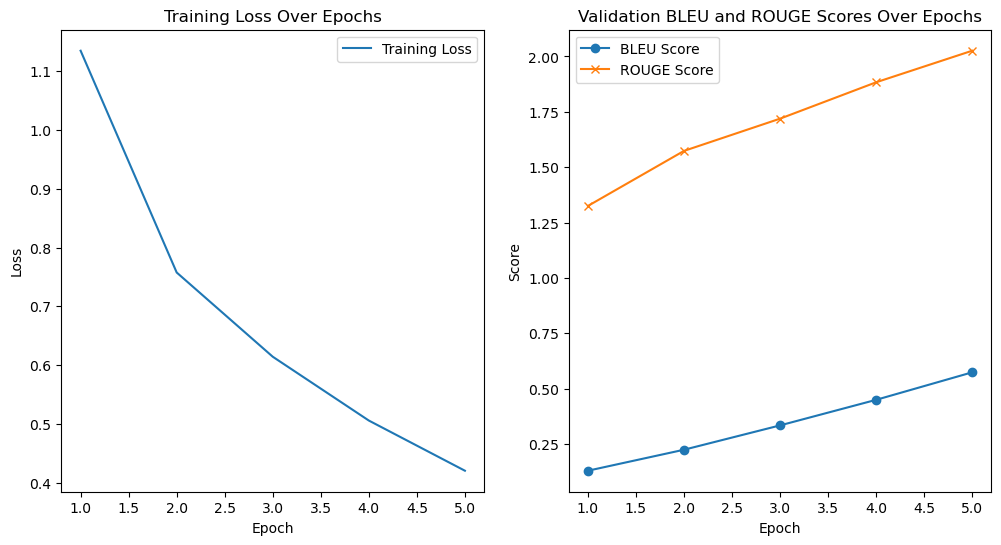

In [ ]:
train_dataset = TextSummarizationDataset(train_data, tokenizer, max_input_length, max_target_length)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = TextSummarizationDataset(test_data, tokenizer, max_input_length, max_target_length)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
validation_dataset = TextSummarizationDataset(val_data, tokenizer, max_input_length, max_target_length)
validation_dataloader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=True)

# Initialize the optimizer and loss function
optimizer = AdamW(model.parameters(), lr=learning_rate)

# Define smoothing for BLEU score
bleu_smoothing = SmoothingFunction().method4

# Lists to store training loss, BLEU scores, and ROUGE scores
train_losses = []
bleu_scores = []
rouge_scores = []
accumulation_steps = 4
# Training loop
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()  # Zero the gradients

    total_loss = 0
    num_batches = 0

    for batch in train_dataloader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            labels=labels,
        )
        loss = outputs.loss
        loss = loss / accumulation_steps  # Divide the loss by accumulation steps
        loss.backward()

        if (num_batches + 1) % accumulation_steps == 0:
            optimizer.step()
            optimizer.zero_grad()

        total_loss += loss.item()
        num_batches += 1

    # Calculate average training loss for the epoch
    average_train_loss = total_loss / num_batches
    train_losses.append(average_train_loss)
    print(f"Epoch {epoch + 1}: Average Training Loss: {average_train_loss}")

    # Calculate BLEU and ROUGE scores
    bleu_score, rouge_score = calculate_scores(model, validation_dataloader)
    bleu_scores.append(bleu_score)
    rouge_scores.append(rouge_score)

    print(f"Epoch {epoch + 1} - Validation BLEU: {bleu_score:.4f}, Validation ROUGE: {rouge_score:.4f}")

    # Check for early stopping
    if average_train_loss < best_validation_loss:
        best_validation_loss = average_train_loss
        patience_counter = 0
        # Save the best model checkpoint
        torch.save(model.state_dict(), f"best_model_checkpoint.pth")
    else:
        patience_counter += 1
        if patience_counter >= early_stopping_patience:
            print(f"Early stopping after {epoch + 1} epochs.")
            break

# Display the progress of epochs in Jupyter
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

plt.subplot(122)
plt.plot(range(1, len(bleu_scores) + 1), bleu_scores, label='BLEU Score', marker='o')
plt.plot(range(1, len(rouge_scores) + 1), rouge_scores, label='ROUGE Score', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title('Validation BLEU and ROUGE Scores Over Epochs')
plt.legend()

plt.show()


In [ ]:
# Save the T5 model using torch.save
# Save the model's state dictionary to a file
torch.save(model.state_dict(), "T5_final.pth")

In [ ]:
model.save_pretrained("T5_final", from_pt=True)
# model = T5ForConditionalGeneration.from_pretrained("T5_final")

In [ ]:
torch.cuda.empty_cache()

In [ ]:
# Test the model on random data from the test_data
model.to("cuda")
model.eval()

In [ ]:
def summarize_text():
    # Load the pre-trained model and tokenizer
    # Select a random row from test_data
    random_test_row = test_data.sample(1)
    target_summary = random_test_row['title'].values[0]
    content = random_test_row['content'].values[0]
    input_ids = tokenizer.encode(content, return_tensors="pt", max_length=max_input_length, padding="max_length", truncation=True).to("cuda")
    generated_ids = model.generate(input_ids, max_length=max_target_length, num_beams=4, length_penalty=2.0, early_stopping=True).to("cuda")
    predicted_summary = tokenizer.decode(generated_ids[0], skip_special_tokens=True, clean_up_tokenization_spaces=True)
    # Summarize the content
    matching_row = combined_data[combined_data['title'] == target_summary]
    # Extract details from the matching row
    author = matching_row['author'].values[0]
    url = matching_row['url'].values[0]
    url_to_image = matching_row['urlToImage'].values[0]
    # Print the details
    print("IntelliShort:", predicted_summary)
    print("By:", author)
    print("Content:", content)
    print("Target Summary:", target_summary)
    print("Read more at:", url)
    print("URL to Image:", url_to_image)
    # return url_to_image


In [ ]:
summarize_text()

IntelliShort: What makes AI a Power Consumption Problem? Why Data Centers Are Making Life
By: Chirag Leuva
Content: heard ai making lives efficient real question makes ai efficient soul artificial intelligence data globally data centers consume terawatthours power annually energy enough support million households united states annually empower million cars yeara data center nothing warehouse filled computers computing large data rivers recently growing number data centers across globe raised consequentialist concern emission let us discuss power problem artificial intelligence facing solutions company come solutionthe power problema wise man said best way solve problem structuring quote finely resonates ai energy consumption problem face today problem energy generation ai overall energy consumption aidata centers one use energy various purposes like making environment sustainable quality lifecirculating around ai works one thing grabs attention data centres demand artificial intelligen

In [ ]:
random_idx = random.randint(0, len(test_data) - 1)
random_sample = test_data.iloc[random_idx]
content = random_sample['content']
target_summary = random_sample['title']
input_ids = tokenizer.encode(content, return_tensors="pt", max_length=max_input_length, padding="max_length", truncation=True).to("cuda")
generated_ids = model.generate(input_ids, max_length=max_target_length, num_beams=4, length_penalty=2.0, early_stopping=True).to("cuda")
predicted_summary = tokenizer.decode(generated_ids[0], skip_special_tokens=True, clean_up_tokenization_spaces=True)

print("Random Test Data:")
print("Content:", content)
print("Target Summary:", target_summary)
print("Predicted Summary:", predicted_summary)


Random Test Data:
Content: google meta parent company facebook used artificial intelligence remove billions fake accounts ads bid crack internet fraud oireachtas committee heardboth companies detailed multibilliondollar investment system security oireachtas finance committee examining authorised push payment app fraud affecting irish consumersthe committee described app use sophisticated techniques trick victims making realtime payments transfer fundsa lucrative business crime gangs concerns use fake social media online ads coax users paying product service existaddressing committee tuesday google government affairs public policy manager ireland ryan meade said tech platform used mixture technology including sophisticated machine learning human review enforce policiesaipowered classifiers flag potentially harmful content globally last year google removed billion ads restricted another billion actions took place ad seen user content moderation scale possible ai mr meade told committeeit

In [ ]:
random_idx = random.randint(0, len(test_data) - 1)
random_sample = test_data.iloc[random_idx]
content = random_sample['content']
target_summary = random_sample['title']
input_ids = tokenizer.encode(content, return_tensors="pt", max_length=max_input_length, padding="max_length", truncation=True).to("cuda")
generated_ids = model.generate(input_ids, max_length=max_target_length, num_beams=4, length_penalty=2.0, early_stopping=True).to("cuda")
predicted_summary = tokenizer.decode(generated_ids[0], skip_special_tokens=True, clean_up_tokenization_spaces=True)

print("Random Test Data:")
print("Content:", content)
print("Target Summary:", target_summary)
print("Predicted Summary:", predicted_summary)

Random Test Data:
Content: image gerd altmann pixabaysam altman ceo openai recently posited thoughtprovoking statement xi expect ai capable superhuman persuasion well superhuman general intelligence may lead strange outcomesthis assertion opens pandora box ethical technological sociological questions compelling ignore step forward new cognitive era ai systems like large language models becoming increasingly sophisticated critical dissect superhuman persuasion could mean altman ai humanitythe anatomy persuasionpersuasion merely act convincing nuanced interplay rhetoric emotional intelligence contextual understanding human persuaders draw upon rich tapestry social cues ethical frameworks shared experiences influence others ai achieves superhuman capabilities domain would mean systems could outperform compelling human orators negotiators influencers swaying opinions decisions ability function bigger smarter creativethe ethical quagmirethe ethical implications ai superhuman persuasive abil

# hugging face

In [ ]:
notebook_login()

In [ ]:
model.push_to_hub("finetuned_t5_news_summ")
T5Tokenizer.push_to_hub("finetuned_t5_news_summ")

In [ ]:
# model=T5ForConditionalGeneration.from_pretrained("C:\\Users\\laksh\\Desktop\\nlp_lakshya\\flask\\t5_new")
# model.push_to_hub(repo_id='finetuned_t5_news_summ',repo_name="finetuned_t5_news_summ")
# T5Tokenizer.push_to_hub(repo_id='finetuned_t5_news_summ',repo_name="finetuned_t5_news_summ")

In [ ]:
# model=T5ForConditionalGeneration.from_pretrained("T5_final")
# model.push_to_hub(repo_id='finetuned_t5_news',repo_name="finetuned_t5_news")
# tokenizer = AutoTokenizer.from_pretrained("model")
# tokenizer.push_to_hub("lavanyaasehgal/finetuned_t5_news")

In [ ]:
 # !huggingface-cli login

# FLASK

In [ ]:
from flask import Flask, request, jsonify

app = Flask(__name__)


In [ ]:
@app.route('/new_summarize', methods=['POST'])
def new_summarize():
    data = request.get_json()
    article = data.get('article')

    # Call your summarization function and obtain the summary, author, URL, and URL to image
    predicted_summary, author, url, url_to_img = summarize_text()

    # Create a response JSON object that includes all the information
    response = {
        'IntelliShort: ': predicted_summary,
        'By: ': author,
        'Read more at: ': url,
        'urlToImg: ': url_to_img
    }

    return jsonify(response)


In [ ]:
if __name__ == '__main__':
    app.run(debug=True)
%tb

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


SystemExit: 1

In [ ]:
 app.url_map._rules

[<Rule '/static/<filename>' (GET, HEAD, OPTIONS) -> static>,
 <Rule '/summarize' (POST, OPTIONS) -> summarize>,
 <Rule '/summarize' (POST, OPTIONS) -> summarize>,
 <Rule '/summarize' (POST, OPTIONS) -> summarize>,
 <Rule '/summarize' (POST, OPTIONS) -> summarize>,
 <Rule '/new_summarize' (POST, OPTIONS) -> new_summarize>]

In [ ]:
if '/summarize' in app.url_map._rules:
    app.view_functions.pop('summarize')

# Seq2seq yesssssssssssssss

In [31]:
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(list(x_tr))

tot_cnt gives the size of vocabulary (which means every unique words in the text)

cnt gives the no. of rare words whose count falls below threshold

tot_cnt - cnt gives the top most common words


In [32]:
thresh=4

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in x_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value

print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 87.18411552346569
Total Coverage of rare words: 44.46672012830794


In [33]:
x_tokenizer = Tokenizer(num_words=tot_cnt-cnt)
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences (i.e one-hot encodeing all the words)
x_tr_seq    =   x_tokenizer.texts_to_sequences(x_tr)
x_val_seq   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr_seq,  maxlen=200, padding='post')
x_val   =   pad_sequences(x_val_seq, maxlen=200, padding='post')

#size of vocabulary ( +1 for padding token)
x_voc   =  x_tokenizer.num_words + 1

print("Size of vocabulary in X = {}".format(x_voc))

Size of vocabulary in X = 356


In [34]:
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_tr))

In [35]:
thresh=6

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in y_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value

print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 78.14271452019561
Total Coverage of rare words: 9.931160887982037


In [36]:
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt)
y_tokenizer.fit_on_texts(list(y_tr))

#convert text sequences into integer sequences (i.e one hot encode the text in Y)
y_tr_seq    =   y_tokenizer.texts_to_sequences(y_tr)
y_val_seq   =   y_tokenizer.texts_to_sequences(y_val)

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr_seq, maxlen=35, padding='post')
y_val   =   pad_sequences(y_val_seq, maxlen=35, padding='post')

#size of vocabulary
y_voc  =   y_tokenizer.num_words +1
print("Size of vocabulary in Y = {}".format(y_voc))

Size of vocabulary in Y = 12918


In [37]:
ind=[]
for i in range(len(y_tr)):
    cnt=0
    for j in y_tr[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_tr=np.delete(y_tr,ind, axis=0)
x_tr=np.delete(x_tr,ind, axis=0)

In [38]:
ind=[]
for i in range(len(y_val)):
    cnt=0
    for j in y_val[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)
y_val=np.delete(y_val,ind, axis=0)
x_val=np.delete(x_val,ind, axis=0)

In [39]:
print("Size of vocabulary from the w2v model = {}".format(x_voc))

K.clear_session()

latent_dim = 300
embedding_dim=200

# Encoder
encoder_inputs = Input(shape=(200,))

#embedding layer
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

#dense layer
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

Size of vocabulary from the w2v model = 356
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 200)]                0         []                            
                                                                                                  
 embedding (Embedding)       (None, 200, 200)             71200     ['input_1[0][0]']             
                                                                                                  
 lstm (LSTM)                 [(None, 200, 300),           601200    ['embedding[0][0]']           
                              (None, 300),                                                        
                              (None, 300)]                                                        
                                                  

In [40]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)

In [44]:
# Start fitting the model with the data

history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,
                  epochs=20,
                  callbacks=[es],
                  batch_size=64,
                  validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

Epoch 1/20
11/11 [==============================] - 181s 16s/step - loss: 9.4584 - val_loss: 9.4525
Epoch 2/20
11/11 [==============================] - 145s 13s/step - loss: 9.4423 - val_loss: 9.3725
Epoch 3/20
11/11 [==============================] - 138s 13s/step - loss: 8.8888 - val_loss: 8.3344
Epoch 4/20
11/11 [==============================] - 137s 12s/step - loss: 8.1868 - val_loss: 8.1973
Epoch 5/20
11/11 [==============================] - 141s 13s/step - loss: 8.0441 - val_loss: 8.1685
Epoch 6/20
11/11 [==============================] - 139s 13s/step - loss: 7.9876 - val_loss: 8.1610
Epoch 7/20
11/11 [==============================] - 142s 13s/step - loss: 7.9592 - val_loss: 8.1615
Epoch 8/20
11/11 [==============================] - 138s 13s/step - loss: 7.9284 - val_loss: 8.1505
Epoch 9/20
11/11 [==============================] - 137s 12s/step - loss: 7.9053 - val_loss: 8.1490
Epoch 10/20
11/11 [==============================] - 140s 12s/step - loss: 7.8834 - val_loss: 8.1450

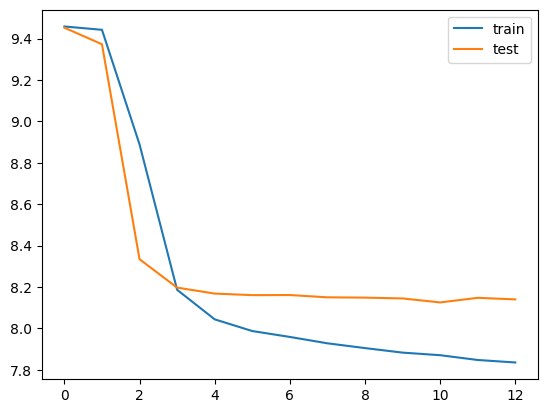

In [45]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [47]:
model.save("seq2seq.h5")

AttributeError: ignored

In [43]:
# import numpy as np
# from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
# from rouge_score import rouge_scorer
# # Function to decode sequences into text (as in your provided code)
# losses = []
# bleu_scores = []
# rouge_scores = []
# epochs=10
# for epoch in range(epochs):
#     # Start fitting the model with the data
#     history = model.fit([x_tr, y_tr[:, :-1]], y_tr.reshape(y_tr.shape[0], y_tr.shape[1], 1)[:, 1:],
#                   epochs=1,  # Train for 1 epoch at a time
#                   callbacks=[es],
#                   batch_size=64,
#                   validation_data=([x_val, y_val[:, :-1]], y_val.reshape(y_val.shape[0], y_val.shape[1], 1)[:, 1:]))

#     # Calculate the loss for the current epoch
#     loss = model.evaluate([x_val, y_val[:, :-1]], y_val.reshape(y_val.shape[0], y_val.shape[1], 1)[:, 1:])

#     # Append the loss to the list
#     losses.append(loss)

#     # Calculate BLEU and ROUGE scores as before
#     bleu_scores_epoch = []
#     rouge_scores_epoch = []

#     for i in range(len(y_val)):
#         input_seq = x_val[i]
#         reference_summary = " ".join([y_tokenizer.index_word[word] for word in y_val[i] if word not in [0, y_tokenizer.word_index['<start>'], y_tokenizer.word_index['<end>']]])

#         # Generate the candidate summary using your decoding function (replace with your actual decoding function)
#         candidate_summary = decode_sequence(input_seq)

#         # Calculate BLEU score
#         reference_summary = reference_summary.split()
#         candidate_summary = candidate_summary.split()
#         smoothie = SmoothingFunction().method4
#         bleu_score = sentence_bleu([reference_summary], candidate_summary, smoothing_function=smoothie)

#         # Calculate ROUGE scores
#         scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
#         scores = scorer.score(reference_summary, candidate_summary)

#         bleu_scores_epoch.append(bleu_score)
#         rouge_scores_epoch.append(scores)

#     # Calculate the average BLEU score for the epoch
#     average_bleu_score = np.mean(bleu_scores_epoch)

#     # Calculate the average ROUGE scores for the epoch
#     average_rouge_scores = {
#         'rouge1': np.mean([score['rouge1'].fmeasure for score in rouge_scores_epoch]),
#         'rouge2': np.mean([score['rouge2'].fmeasure for score in rouge_scores_epoch]),
#         'rougeL': np.mean([score['rougeL'].fmeasure for score in rouge_scores_epoch]),
#     }

#     # Append the average BLEU and ROUGE scores for the epoch
#     bleu_scores.append(average_bleu_score)
#     rouge_scores.append(average_rouge_scores)

#     if epoch > 0 and losses[-1] > losses[-2]:
#         print("Early stopping triggered.")
#         break

# print("Average BLEU Score:", average_bleu_score)
# print("Average ROUGE Scores:", average_rouge_scores)


 3/11 [=======>......................] - ETA: 2:09 - loss: 9.4653

KeyboardInterrupt: ignored

In [ ]:
from matplotlib import pyplot

# Plot Loss
pyplot.plot(losses, label='Loss')
pyplot.xlabel('Epoch')
pyplot.ylabel('Loss')
pyplot.title('Training Loss')
pyplot.legend()
pyplot.show()

# Plot BLEU Scores
pyplot.plot(bleu_scores, label='BLEU Score')
pyplot.xlabel('Epoch')
pyplot.ylabel('BLEU Score')
pyplot.title('BLEU Scores')
pyplot.legend()
pyplot.show()

# Plot ROUGE Scores
for metric in ['rouge1', 'rouge2', 'rougeL']:
    pyplot.plot([score[metric].fmeasure for score in rouge_scores], label=metric)
pyplot.xlabel('Epoch')
pyplot.ylabel('ROUGE Score')
pyplot.title('ROUGE Scores')
pyplot.legend()
pyplot.show()


# GPT2 small yesssssssssssssssssssssssssssss

In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import pandas as pd
import torch
import random

# Load a pre-trained GPT-2 model and tokenizer
model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

# Add a pad token and set it as the EOS token
tokenizer.add_special_tokens({'pad_token': '[PAD]', 'eos_token': '[PAD]'})
model.config.pad_token_id = tokenizer.eos_token_id

# Load your dataset (you need to define and load your dataset here)
# Assuming you have a DataFrame 'train' for training data and 'test' for test data
# with 'content' column for both.
test_generated_summaries = []

# Preprocess your data (tokenize, encode, etc.) - customize this based on your dataset structure
train_texts = train['content'].tolist()
train_summaries = train['title'].tolist()

# Train the model using the 'train' data as shown in the previous code.

# Initialize a list to store the generated summaries for testing
test_texts = test['content'].tolist()
test_samples = random.sample(test_texts, 10)  # You can change the number of random samples to test

for text in test_samples:  # Iterate over test_samples instead of test_texts
    # Split the long input text into smaller chunks
    chunks = [text[i:i+500] for i in range(0, len(text), 500)]

    for chunk in chunks:
        # Tokenize and encode the chunk
        input_ids = tokenizer.encode(chunk, return_tensors="pt", max_length=len(chunk), truncation=True, padding=True)

        # Generate summaries for each chunk in the test data
        summary_ids = model.generate(input_ids, max_length=len(chunk), min_length=10, length_penalty=2.0, num_beams=4, early_stopping=True, pad_token_id=model.config.pad_token_id, attention_mask=input_ids.ne(model.config.pad_token_id))
        summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
        test_generated_summaries.append(summary)

# Now, 'test_generated_summaries' contains the summaries for the test samples


In [ ]:
import torch

# Define a directory and filename for saving the model in H5 format
model_h5_filename = "fine_tuned_gpt2_model.h5"

# Save the fine-tuned model state_dict to the H5 file
torch.save(model.state_dict(), model_h5_filename)


In [ ]:
# Define a directory where you want to save the model
output_dir = "gpt2_finetuned"

# Save the model and tokenizer to the specified directory
model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)


('gpt2_finetuned/tokenizer_config.json',
 'gpt2_finetuned/special_tokens_map.json',
 'gpt2_finetuned/vocab.json',
 'gpt2_finetuned/merges.txt',
 'gpt2_finetuned/added_tokens.json')

In [ ]:
import pandas as pd

# Combine the generated summaries with the respective actual content
data = {'Generated Summary': test_generated_summaries}
df = pd.DataFrame(data)

# Display the resulting DataFrame
print(df)


                                                                                                                                                                                           Generated Summary
0    reuters cryptocurrency market state flux recently driven expected approval spot exchangetraded funds etfs speculation surrounding bitcoinbased products including unfounded news blackrock nyse etf ...
1    ationthe ai pointed approval etf coincided bitcoin alltime high suggested similar growth trajectory could follow approval spot bitcoin etfs however also cautioned investors potential volatility ti...
2    vestors prepare potential fluctuations consider investment strategies carefully light developmentsthis article generated support ai reviewed editor information see tc.\n\nReferences\n\n[1] See, e....
3    loading metrics open access peerreviewedresearch article caiming zhong zehua zhang explanation clustering result based multiobjective optimization liang chen caiming zhong zeh

In [ ]:
df.to_csv('gpt2_summaries.csv', index=False)

# GPT2 small

In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import pandas as pd
import torch
import random

# Load a pre-trained GPT-2 model and tokenizer
model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

# Add a pad token and set it as the EOS token
tokenizer.add_special_tokens({'pad_token': '[PAD]', 'eos_token': '[PAD]'})
model.config.pad_token_id = tokenizer.eos_token_id

# Load your dataset (you need to define and load your dataset here)
# Assuming you have a DataFrame 'train' for training data and 'test' for test data
# with 'content' column for both.
test_generated_summaries = []

# Preprocess your data (tokenize, encode, etc.) - customize this based on your dataset structure
train_texts = train['content'].tolist()
train_summaries = train['title'].tolist()

# Train the model using the 'train' data as shown in the previous code.

# Initialize a list to store the generated summaries for testing
test_texts = test['content'].tolist()
test_samples = random.sample(test_texts, 10)  # You can change the number of random samples to test

for text in test_samples:  # Iterate over test_samples instead of test_texts
    # Split the long input text into smaller chunks
    chunks = [text[i:i+500] for i in range(0, len(text), 500)]

    for chunk in chunks:
        # Tokenize and encode the chunk
        input_ids = tokenizer.encode(chunk, return_tensors="pt", max_length=len(chunk), truncation=True, padding=True)

        # Generate summaries for each chunk in the test data
        summary_ids = model.generate(input_ids, max_length=len(chunk), min_length=10, length_penalty=2.0, num_beams=4, early_stopping=True, pad_token_id=model.config.pad_token_id, attention_mask=input_ids.ne(model.config.pad_token_id))
        summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
        test_generated_summaries.append(summary)

# Now, 'test_generated_summaries' contains the summaries for the test samples


# DistilBERT

In [ ]:
print(neuralcoref.__version__)  # Check 'neuralcoref' version
print(spacy.__version__)

NameError: ignored

In [ ]:
# Create a CoreferenceHandler with desired greedyness
handler = CoreferenceHandler(greedyness=0.4)

# Sample dataset, replace this with your actual dataset
dataset = combined_data['content']  # Only the content is used

# Initialize the Summarizer with the CoreferenceHandler
model = Summarizer(sentence_handler=handler)

# Loop through your dataset and generate summaries
summaries = []
for content in dataset:
    # Summarize the content using BERT
    summary = model(content)

    # Use the generated summary as the title
    summaries.append({
        'title': summary,
        'content': content,
    })
bert_sum = pd.DataFrame(summaries)

# Save the DataFrame to a CSV file
bert_sum.to_csv('/content/drive/MyDrive/nlp data/bert_summaries.csv', index=False)

AttributeError: ignored

# GPT

In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import pandas as pd
import torch

# Load a pre-trained GPT-2 model and tokenizer
model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

# Add a pad token and set it as the EOS token
tokenizer.add_special_tokens({'pad_token': '[PAD]', 'eos_token': '[PAD]'})
model.config.pad_token_id = tokenizer.eos_token_id

# Load your dataset (you need to define and load your dataset here)
# Assuming you have a DataFrame 'train' for training data and 'test' for test data
# with 'content' column for both.

# Preprocess your data (tokenize, encode, etc.) - customize this based on your dataset structure
train_texts = train['content'].tolist()
train_summaries = train['title'].tolist()

# Initialize a list to store the generated summaries
generated_summaries = []

# Define the maximum chunk length (less than 1024 tokens)
max_chunk_length = 700  # Adjust this as needed

for text in train_texts:
    # Split the long input text into smaller chunks
    chunks = [text[i:i+max_chunk_length] for i in range(0, len(text), max_chunk_length)]

    for chunk in chunks:
        # Tokenize and encode the chunk
        input_ids = tokenizer.encode(chunk, return_tensors="pt", max_length=len(chunk), truncation=True, padding=True)

        # Generate summaries for each chunk
        summary_ids = model.generate(input_ids, max_length=len(chunk), min_length=10, length_penalty=2.0, num_beams=4, early_stopping=True, pad_token_id=model.config.pad_token_id, attention_mask=input_ids.ne(model.config.pad_token_id))
        summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
        generated_summaries.append(summary)

# Now, 'generated_summaries' contains the summaries for the training data

# Initialize a list to store the generated summaries for the test data
test_texts = test['content'].tolist()
test_generated_summaries = []

for text in test_texts:
    # Split the long input text into smaller chunks
    chunks = [text[i:i+max_chunk_length] for i in range(0, len(text), max_chunk_length)]

    for chunk in chunks:
        # Tokenize and encode the chunk
        input_ids = tokenizer.encode(chunk, return_tensors="pt", max_length=len(chunk), truncation=True, padding=True)

        # Generate summaries for each chunk in the test data
        summary_ids = model.generate(input_ids, max_length=len(chunk), min_length=10, length_penalty=2.0, num_beams=4, early_stopping=True, pad_token_id=model.config.pad_token_id, attention_mask=input_ids.ne(model.config.pad_token_id))
        summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
        test_generated_summaries.append(summary)

# Now, 'test_generated_summaries' contains the summaries for the test data


In [ ]:
!pip install transformers

In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import pandas as pd
import torch

# Load a pre-trained GPT-2-small model and tokenizer
model_name = "gpt2-small"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

# Add a pad token and set it as the EOS token
tokenizer.add_special_tokens({'pad_token': '[PAD]', 'eos_token': '[PAD]'})
model.config.pad_token_id = tokenizer.eos_token_id

# Load your dataset (you need to define and load your dataset here)
# Assuming you have a DataFrame 'train' for training data and 'test' for test data
# with 'content' column for both.

# Preprocess your data (tokenize, encode, etc.) - customize this based on your dataset structure
train_texts = train['content'].tolist()
train_summaries = train['title'].tolist()

# Initialize a list to store the generated summaries
generated_summaries = []

# Define the maximum chunk length (less than 1024 tokens)
max_chunk_length = 700  # Adjust this as needed

for text in train_texts:
    # Split the long input text into smaller chunks
    chunks = [text[i:i+max_chunk_length] for i in range(0, len(text), max_chunk_length)]

    for chunk in chunks:
        # Tokenize and encode the chunk
        input_ids = tokenizer.encode(chunk, return_tensors="pt", max_length=len(chunk), truncation=True, padding=True)

        # Generate summaries for each chunk
        summary_ids = model.generate(input_ids, max_length=len(chunk), min_length=10, length_penalty=2.0, num_beams=4, early_stopping=True, pad_token_id=model.config.pad_token_id, attention_mask=input_ids.ne(model.config.pad_token_id))
        summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
        generated_summaries.append(summary)

# Now, 'generated_summaries' contains the summaries for the training data

# Initialize a list to store the generated summaries for the test data
test_texts = test['content'].tolist()
test_generated_summaries = []

for text in test_texts:
    # Split the long input text into smaller chunks
    chunks = [text[i:i+max_chunk_length] for i in range(0, len(text), max_chunk_length)]

    for chunk in chunks:
        # Tokenize and encode the chunk
        input_ids = tokenizer.encode(chunk, return_tensors="pt", max_length=len(chunk), truncation=True, padding=True)

        # Generate summaries for each chunk in the test data
        summary_ids = model.generate(input_ids, max_length=len(chunk), min_length=10, length_penalty=2.0, num_beams=4, early_stopping=True, pad_token_id=model.config.pad_token_id, attention_mask=input_ids.ne(model.config.pad_token_id))
        summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
        test_generated_summaries.append(summary)

# Now, 'test_generated_summaries' contains the summaries for the test data


ModuleNotFoundError: ignored

# BERTSUM

In [ ]:
df=pd.DataFrame()
df=combined_data[['title','content']]

In [ ]:
# Load the pre-trained BERT model and tokenizer for summarization
model_name = "bert-base-uncased"
model = BertForSummarization.from_pretrained(model_name)
tokenizer = BertTokenizer.from_pretrained(model_name)

# Assuming you have a DataFrame called 'df' with a 'content' column
df['summary'] = ""

for index, row in df.iterrows():
    content = row['content']
    sentences = nltk.sent_tokenize(content)  # Tokenize into sentences
    scores = []  # Store importance scores for each sentence
    for sentence in sentences:
        inputs = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True)
        outputs = model(**inputs)
        scores.append(outputs.logits.sum().item())
    top_sentences = [sentences[i] for i in sorted(range(len(scores)), key=lambda i: scores[i], reverse=True)[:5]]  # Select the top 5 sentences
    summary = " ".join(top_sentences)  # Combine the selected sentences as the summary
    df.at[index, 'summary'] = summary

# Save the DataFrame with the generated summaries
df.to_csv('summarized_data_bert.csv', index=False)


NameError: ignored

# T5

In [ ]:
# Load the T5 model and tokenizer
model_name = "t5-small"
model = T5ForConditionalGeneration.from_pretrained(model_name)
tokenizer = T5Tokenizer.from_pretrained(model_name)

# Define a function for text summarization
def generate_summary(text):
    inputs = tokenizer.encode("summarize: " + text, return_tensors="pt", max_length=1024, truncation=True)
    summary_ids = model.generate(inputs, max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

train['pred_title'] = ""  # Create a new column for predicted summaries
test['pred_title'] = ""   # Create a new column for predicted summaries

for index, row in train.iterrows():
    content = row['content']
    summary = generate_summary(content)
    train.at[index, 'pred_title'] = summary  # Save the predicted summary in the new column

for index, row in test.iterrows():
    content = row['content']
    summary = generate_summary(content)
    test.at[index, 'pred_title'] = summary  # Save the predicted summary in the new column

# Calculate BLEU scores using the generated summaries and 'title' as reference
train_bleu_scores = []
test_bleu_scores = []

for index, row in train.iterrows():
    generated_summary = row['pred_title']
    reference_summary = row['title']
    bleu_score = sentence_bleu([reference_summary.split()], generated_summary.split())
    train_bleu_scores.append(bleu_score)

for index, row in test.iterrows():
    generated_summary = row['pred_title']
    reference_summary = row['title']
    bleu_score = sentence_bleu([reference_summary.split()], generated_summary.split())
    test_bleu_scores.append(bleu_score)

# Calculate the mean BLEU score
mean_train_bleu = sum(train_bleu_scores) / len(train_bleu_scores)
mean_test_bleu = sum(test_bleu_scores) / len(test_bleu_scores)

print("Mean BLEU Score (Training):", mean_train_bleu)
print("Mean BLEU Score (Testing):", mean_test_bleu)

# Save the results back to your DataFrames
train.to_csv('train_with_summaries.csv', index=False)
test.to_csv('test_with_summaries.csv', index=False)


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


# T5 with Sir's code

In [ ]:
MAX_INPUT_LENGTH = 1024
MIN_TARGET_LENGTH = 5
MAX_TARGET_LENGTH = 128
BATCH_SIZE = 8
LEARNING_RATE = 0.002
MAX_EPOCHS = 10
MODEL_CHECKPOINT = "t5-small" # Name of Model

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(MODEL_CHECKPOINT)

In [ ]:
if MODEL_CHECKPOINT in ["t5-small", "t5-base"]:
  prefix = "summarize: "
else:
  prefix = ""

In [ ]:
# #Preprocessing
# def preprocess_function(examples):
#   inputs = [prefix + doc for doc in examples["content"]]
#   model_inputs = tokenizer(inputs, max_length=MAX_INPUT_LENGTH,truncation=True)
#   # Setup the tokenizer for targets
#   with tokenizer.as_target_tokenizer():
#     labels = tokenizer(
#     examples["title"], max_length=MAX_TARGET_LENGTH, truncation=True
#     )
#   model_inputs["labels"] = labels["input_ids"]
#   return model_inputs

In [ ]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 823
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   keyword     817 non-null    object
 1   url         817 non-null    object
 2   title       817 non-null    object
 3   content     817 non-null    object
 4   urlToImage  770 non-null    object
 5   author      732 non-null    object
dtypes: object(6)
memory usage: 44.7+ KB


In [ ]:
def preprocess_function(row):
    if 'content' in row and isinstance(row['content'], str):
        document = row['content']
        if MODEL_CHECKPOINT in ["t5-small", "t5-base"]:
            document = "summarize: " + document
        model_inputs = tokenizer(document, max_length=MAX_INPUT_LENGTH, truncation=True, padding="max_length", return_tensors="pt")
        if 'summary' in row and isinstance(row['summary'], str):
            with tokenizer.as_target_tokenizer():
                labels = tokenizer(row['summary'], max_length=MAX_TARGET_LENGTH, truncation=True, padding="max_length", return_tensors="pt")
            model_inputs["labels"] = labels["input_ids"]
        return model_inputs
    else:
        return {}


In [ ]:
# def preprocess_function(row):
#     # Check if the 'content' column exists and is a non-empty string
#     if 'content' in row and isinstance(row['content'], str):
#         document = row['content']
#         # Prefix if needed
#         if MODEL_CHECKPOINT in ["t5-small", "t5-base"]:
#             document = "summarize: " + document
#         # Tokenize the document
#         model_inputs = tokenizer(document, max_length=4000, truncation=True)
#         # Setup the tokenizer for targets (if you have a 'summary' column)
#         if 'summary' in row and isinstance(row['summary'], str):
#             with tokenizer.as_target_tokenizer():
#                 labels = tokenizer(row['summary'], max_length=4000, truncation=True)
#             model_inputs["labels"] = labels["input_ids"]
#         return model_inputs
#     else:
#         return {}


In [ ]:
tokenized_train = train.apply(preprocess_function, axis=1)
tokenized_test = test.apply(preprocess_function, axis=1)

In [ ]:
model = AutoModelForSeq2SeqLM.from_pretrained(MODEL_CHECKPOINT)
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

In [ ]:
# Get the model name
model_name = MODEL_CHECKPOINT.split("/")[-1]

# Define training arguments
args = Seq2SeqTrainingArguments(
    f"{model_name}-finetuned",
    evaluation_strategy="steps",  # Set to "steps" for training without evaluation
    learning_rate=0.0001,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=10,
    predict_with_generate=True,
    fp16=True
)

In [ ]:
import accelerate
accelerate.__version__

'0.24.0'

In [ ]:
# Define input_shape as a tuple with two values
input_shape = (8, seq_length)


NameError: ignored

In [ ]:
# Create the Seq2SeqTrainer and train the model
trainer = Seq2SeqTrainer(
    model.to(device),
    args,
    train_dataset=tokenized_train,
    data_collator=data_collator,
    tokenizer=tokenizer
)

trainer.train()

ValueError: ignored

# Testing

In [ ]:
# new_content = "New news article content goes here"

# # Generate a summary (Y)
# generated_summary = model.generate_summary(new_content)

# # Find the original URL associated with the content
# original_url = df[df['content'] == new_content]['url'].values[0]

# # Display the summary and URL
# print("Generated Summary:", generated_summary)
# print("Original URL:", original_url)


In [ ]:
random_row = train_data.sample(n=1)

# later

In [ ]:
# metric = load_metric("rouge")

In [ ]:
# # Define the compute_metrics function
# def compute_metrics(eval_pred):
#     predictions, labels = eval_pred
#     preds = np.where(predictions != -100, predictions, tokenizer.pad_token_id)
#     decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)

#     # Replace -100 in the labels as we can't decode them.
#     labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
#     decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

#     # Rouge expects a newline after each sentence
#     decoded_preds = ["\n".join(nltk.sent_tokenize(pred.strip())) for pred in decoded_preds]
#     decoded_labels = ["\n".join(nltk.sent_tokenize(label.strip())) for label in decoded_labels]

#     result = metric.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)

#     # Extract a few results
#     result = {key: value.mid.fmeasure * 100 for key, value in result.items()}

#     # Add mean generated length
#     prediction_lens = [np.count_nonzero(pred != tokenizer.pad_token_id) for pred in predictions]
#     result["gen_len"] = np.mean(prediction_lens)

#     return {k: round(v, 4) for k, v in result.items()}


In [ ]:
# def compute_metrics(eval_pred, df, generated_col, reference_col):
#     predictions, labels = eval_pred
#     preds = np.where(predictions != -100, predictions, tokenizer.pad_token_id)
#     decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)

#     # Replace -100 in the labels as we can't decode them.
#     labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
#     decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

#     # Rouge expects a newline after each sentence
#     decoded_preds = ["\n".join(nltk.sent_tokenize(pred.strip())) for pred in decoded_preds]
#     decoded_labels = ["\n".join(nltk.sent_tokenize(label.strip())) for label in decoded_labels]

#     references = train_data[reference_col].tolist()

#     result = metric.compute(predictions=decoded_preds, references=references, use_stemmer=True)

#     # Extract a few results
#     result = {key: value.mid.fmeasure * 100 for key, value in result.items()}

#     # Add mean generated length
#     prediction_lens = [np.count_nonzero(pred != tokenizer.pad_token_id) for pred in predictions]
#     result["gen_len"] = np.mean(prediction_lens)

#     return {k: round(v, 4) for k, v in result.items()}


In [ ]:
if torch.cuda.is_available():
  device = torch.device("cuda")
  print("GPU is available and being used")
else:
  device = torch.device("cpu")
  print("GPU is not available, using CPU instead")

GPU is available and being used


In [ ]:
model_name = MODEL_CHECKPOINT.split("/")[-1]
#model = model_name.to(device)
args = Seq2SeqTrainingArguments(
  f"{model_name}-finetuned",
  evaluation_strategy = "epoch",
  learning_rate=0.001,
  per_device_train_batch_size=32,
  per_device_eval_batch_size=32,
  weight_decay=0.01,
  save_total_limit=3,
  num_train_epochs=10,
  predict_with_generate=True,
  fp16=True
)

In [ ]:
import accelerate
accelerate.__version__

'0.24.0'

In [ ]:
len(train_data)

571

In [ ]:
trainer = Seq2SeqTrainer(
  model.to(device),
  args,
  train_dataset=tokenized_train,
  eval_dataset=tokenized_test,
  data_collator=data_collator,
  tokenizer=tokenizer,
  compute_metrics=compute_metrics
)

In [ ]:
trainer.train()

KeyError: ignored

In [ ]:
predict_results = trainer.predict(tokenized_test,max_length=128, num_beams=3)

KeyError: ignored

In [ ]:
if args.predict_with_generate:

  preds = np.where(predict_results.predictions != -100, predict_results.predictions, tokenizer.pad_token_id)
  predictions = tokenizer.batch_decode(preds, skip_special_tokens=True,clean_up_tokenization_spaces=True)
  predictions = [pred.strip() for pred in predictions]

NameError: ignored

In [ ]:
test['summary'][:2]

['Three men accused of involvement in the murder of a Scottish woman in Mauritius have returned to the crime scene as part of the police investigation.',
 'Covering costs of sending children back to school has left almost a fifth of Northern Ireland parents cutting their spending on food, a survey has found.']

In [ ]:
# Assuming you have a DataFrame named train_data
eval_predictions = trainer.predict(tokenized_test, max_length=128, num_beams=3)
metrics = compute_metrics(eval_predictions, train_data, 'content', 'summary')

NameError: ignored

In [ ]:
predictions[:2]

NameError: ignored

In [ ]:

# t5 = "t5-small"  # You can choose a different T5 model if needed
# tokenizer = T5Tokenizer.from_pretrained(t5)
# model = T5ForConditionalGeneration.from_pretrained(t5)

# # Create an empty list to store the generated summaries
# summarizd = []
# summarizd=test
# # Iterate through the articles in your dataset
# for index, row in train.iterrows():
#     news_content = row['content']

#     # Preprocess and tokenize the news article
#     inputs = tokenizer.encode("summarize: " + news_content, return_tensors="pt", max_length=512, truncation=True)

#     # Perform inference with the T5 model
#     with torch.no_grad():
#         summary_ids = model.generate(
#             inputs,
#             max_length=150,  # You can adjust this as needed
#             min_length=40,   # You can adjust this as needed
#             length_penalty=2.0,  # You can adjust this as needed
#             num_beams=4,  # You can adjust this as needed
#             early_stopping=True
#         )

#     # Decode the summary from the generated IDs
#     summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

#     # Append the generated summary to the list
#     summarizd.append(summary)

# # Now, your 'summarizd' list contains T5-generated summaries


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 9.1 MB/s eta 0:00:00


ImportError: ignored

# NEW YT

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/nlp data/combined_data.csv")

In [ ]:
df=df[['keyword','content','title']]

In [ ]:
df['articles_length']=df['content'].apply(lambda x:len(x.split()))
df['summaries_length']=df['title'].apply(lambda x:len(x.split()))

In [ ]:
df

,keyword,content,title,articles_length,summaries_length
0,artificial intelligence,digitalai week made generally available denali...,Digital.ai Update Extends Scope and Reach of D...,304,11
1,artificial intelligence,opinion linux foundation members summit monter...,The battle between open source and 'sort of' o...,43,15
2,artificial intelligence,bar floor huge congrats state washington state...,"Slog AM: Washington Clears Rape Kit Backlog, U...",737,16
3,artificial intelligence,takes longer close deals office leases subleas...,Leasing Offices Now Takes Longer in San Francisco,273,8
4,artificial intelligence,cheap card table south market loft craig newma...,Craig Newmark of Craigslist Has a New Mission:...,1642,10
...,...,...,...,...,...
812,transfer learning,usage physical cash diminishes digital consump...,Banking Technology: Delivering the Next-Gen UX...,1143,9
813,transfer learning,new pathways key points global need credential...,"The Global Credentialing Landscape: Messy, Mas...",481,8
814,transfer learning,rapidly evolving landscape data analysis manag...,Transforming Data Analysis: The Game-Changing ...,1158,11
815,transfer learning,wellmotivated school leaver aspire securing nu...,My daughter wants to study nursing but I worry...,280,19


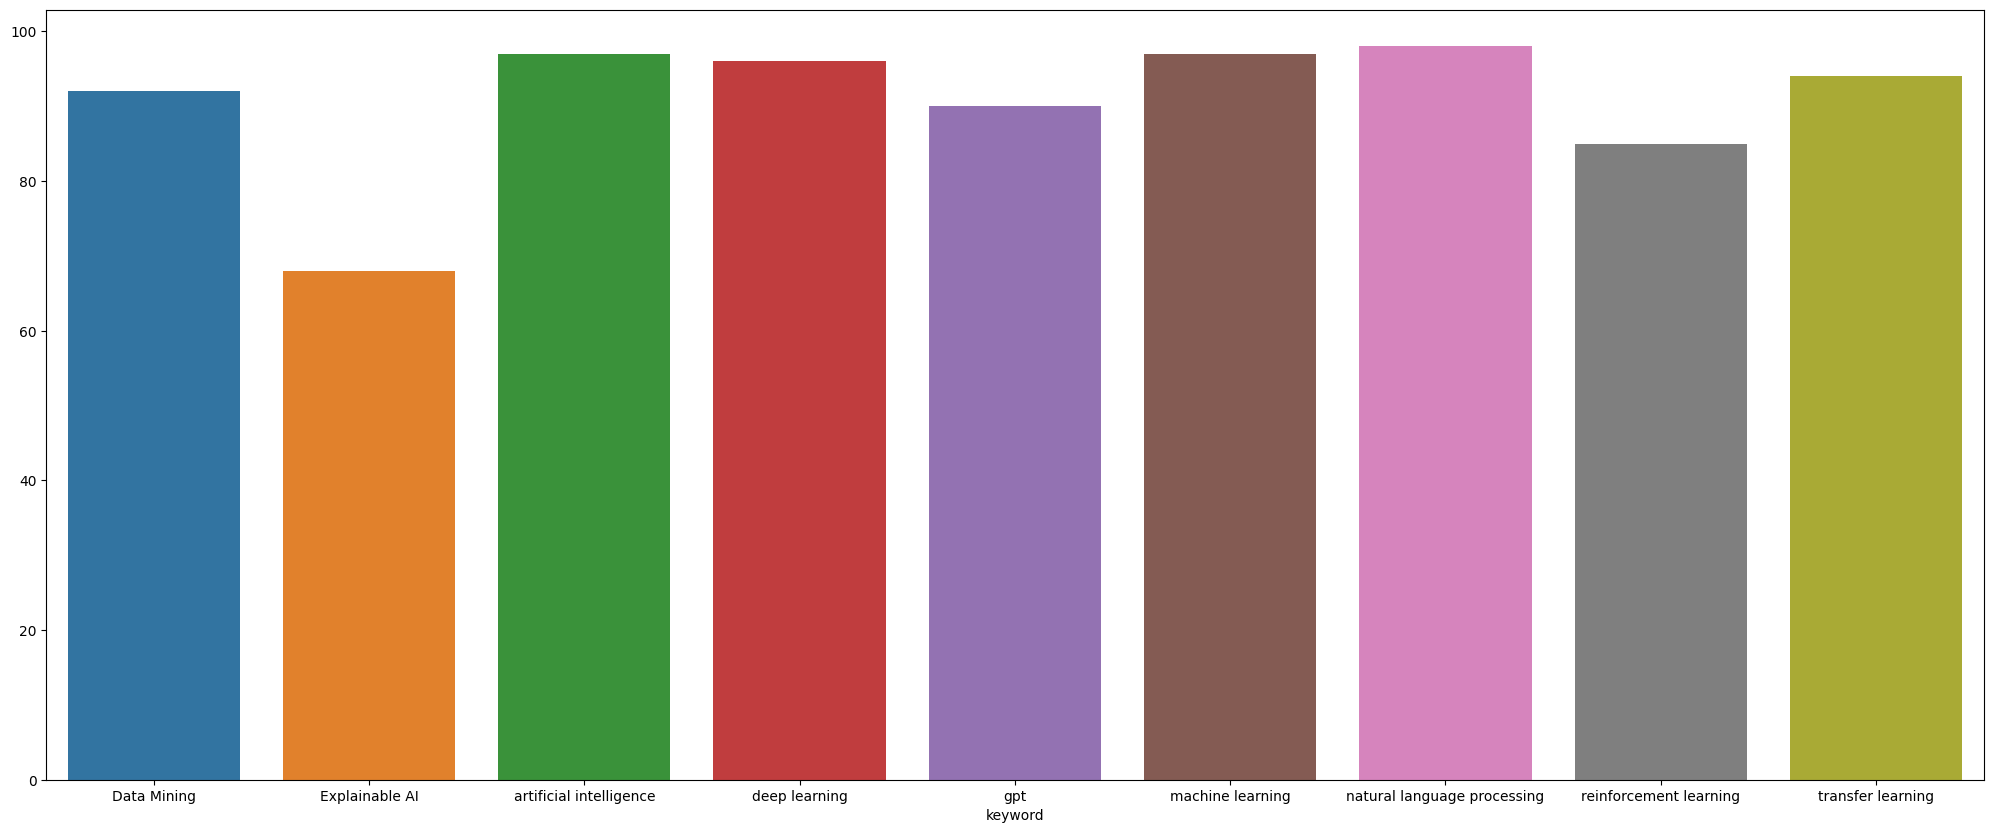

In [ ]:
plt.figure(figsize=(25, 10))
category_sizes=df.groupby('keyword').size()
sns.barplot(x=category_sizes.index, y=category_sizes)
plt.show()

In [ ]:
category_length=df.groupby("keyword",0).agg({"articles_length":'mean',"summaries_length":'mean'})
category_length

,articles_length,summaries_length
keyword,,
Data Mining,910.141304,12.065217
Explainable AI,1135.132353,11.294118
artificial intelligence,819.608247,10.639175
deep learning,1493.312500,10.552083
gpt,689.466667,10.900000
machine learning,1310.845361,11.113402
natural language processing,1456.959184,12.540816
reinforcement learning,1302.682353,10.682353
transfer learning,1561.010638,11.489362


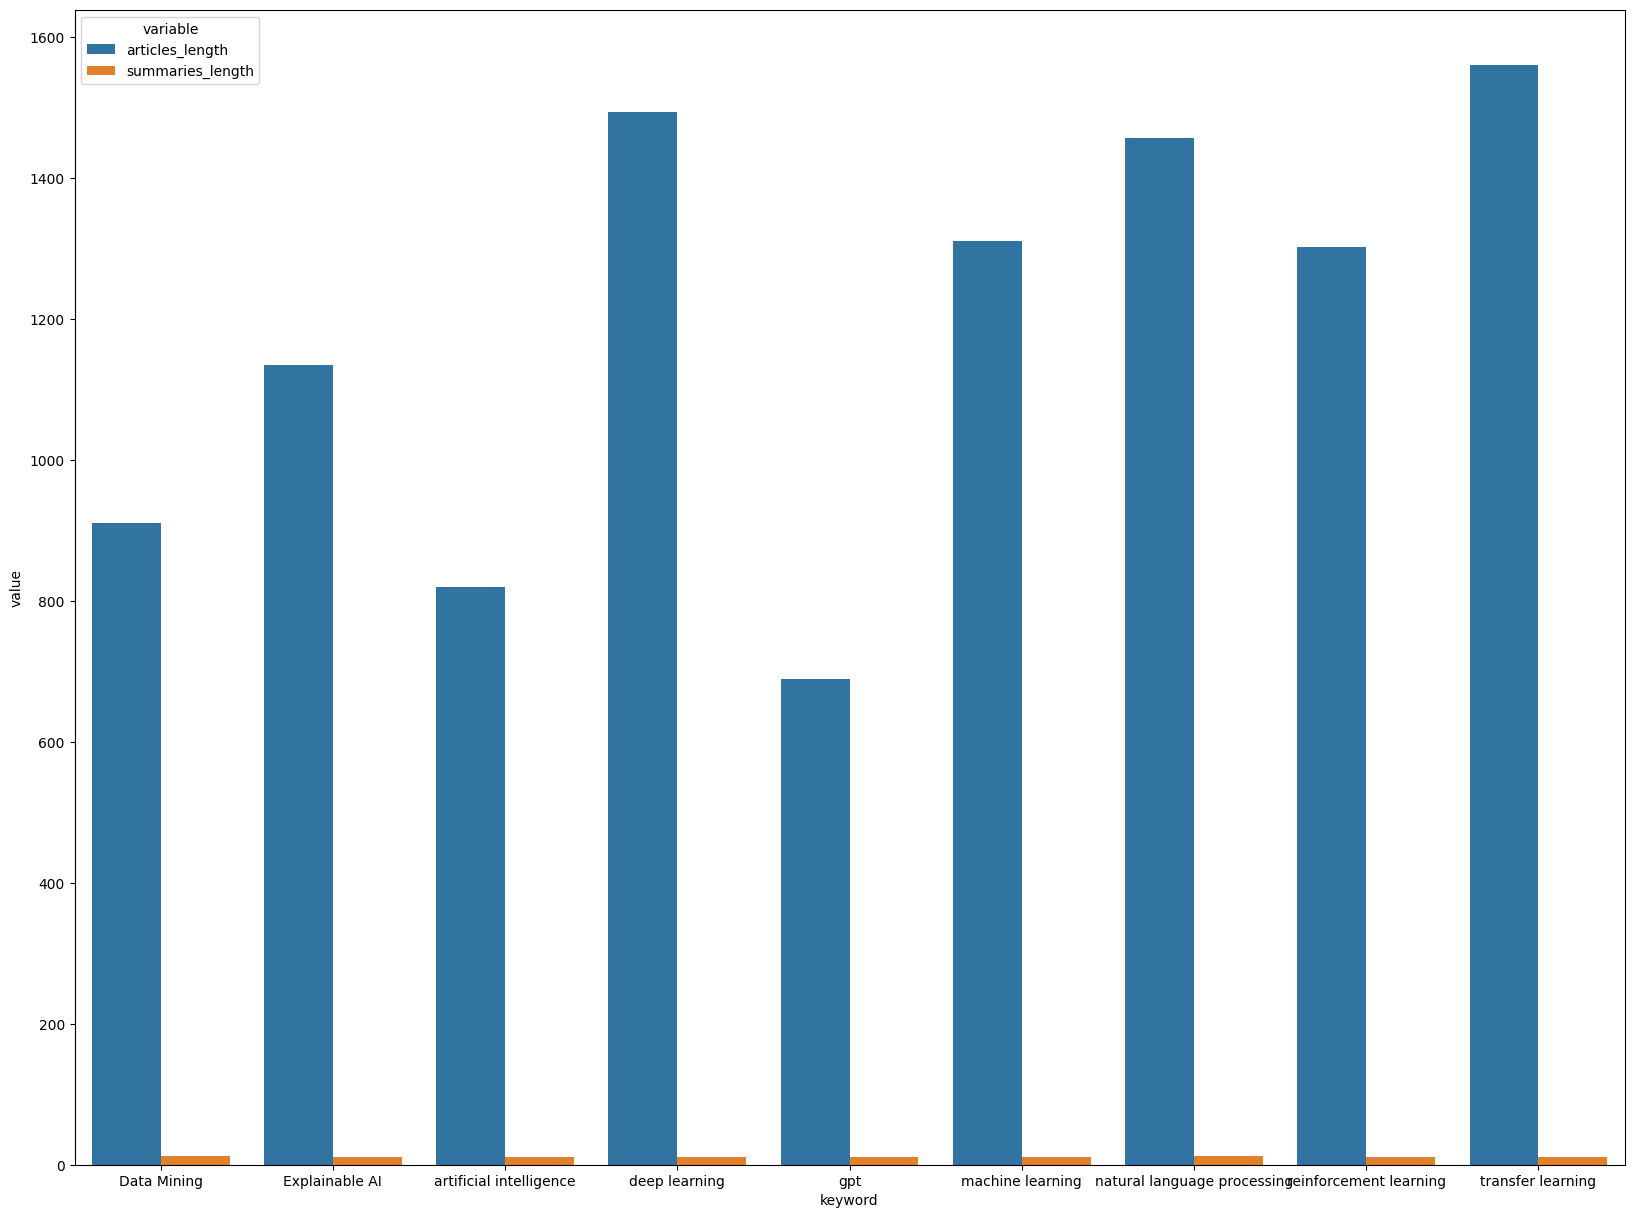

In [ ]:
df_m=pd.melt(category_length,ignore_index=False)
plt.figure(figsize=(20,15))
sns.barplot(x=df_m.index,y='value',hue='variable',data=df_m)
plt.show()

In [ ]:
pd.melt(category_length,ignore_index=False).groupby('variable').mean()

,value
variable,
articles_length,1186.573179
summaries_length,11.252947


In [ ]:
!nvdia-smi

/bin/bash: line 1: nvdia-smi: command not found


In [ ]:
!pip pytorch-lightning -version


ERROR: unknown command "pytorch-lightning"


In [ ]:
!pip show pytorch-lightning


Name: pytorch-lightning
Version: 1.2.7
Summary: PyTorch Lightning is the lightweight PyTorch wrapper for ML researchers. Scale your models. Write less boilerplate.
Home-page: https://github.com/PyTorchLightning/pytorch-lightning
Author: William Falcon et al.
Author-email: waf2107@columbia.edu
License: Apache-2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: fsspec, future, numpy, PyYAML, tensorboard, torch, torchmetrics, tqdm
Required-by: 


In [ ]:
# !sudo apt-get install build-essential
# !pip install --upgrade setuptools wheel

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.5/121.5 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 19.0 MB/s eta 0:00:00


In [ ]:
# !pip install torch==2.0  # Replace "2.0" with the desired version number


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.1/177.1 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [ ]:
!pip install --upgrade pip
!apt-get install -y build-essential
!pip install --upgrade setuptools wheel
!apt-get install libffi-dev
!pip cache purge

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.2 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
build-essential is already the newest version (12.9ubuntu3).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  libffi-dev
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 63.7 kB of archives.
After this operation, 336 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libffi-dev amd64 3.4.2-4 [63.7 kB]
Fetched 63.7 kB in 1s (51.7 kB/s)
Selecting previously unselected package libffi-dev:amd64.
(Reading database ... 120874 files and directories cu

In [ ]:
!pip install accelerate

In [ ]:
!pip install torch

In [ ]:
!pip install transformers


In [ ]:
! pip install -U accelerate
! pip install -U transformers

In [ ]:
# Import necessary libraries
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, Seq2SeqTrainingArguments, Seq2SeqTrainer, DataCollatorForSeq2Seq
import accelerate

# Define the T5 model and tokenizer
MAX_INPUT_LENGTH = 1024
MIN_TARGET_LENGTH = 5
MAX_TARGET_LENGTH = 128
BATCH_SIZE = 8
LEARNING_RATE = 0.002
MAX_EPOCHS = 10
MODEL_CHECKPOINT = "t5-small"  # Name of Model

tokenizer = AutoTokenizer.from_pretrained(MODEL_CHECKPOINT)

if MODEL_CHECKPOINT in ["t5-small", "t5-base"]:
    prefix = "summarize: "
else:
    prefix = ""

# Read your dataset
data = pd.read_csv("/content/combined_data.csv")

# Preprocess the data
def preprocess_function(row):
    if 'content' in row and isinstance(row['content'], str):
        document = row['content']
        if MODEL_CHECKPOINT in ["t5-small", "t5-base"]:
            document = "summarize: " + document
        model_inputs = tokenizer(document, max_length=MAX_INPUT_LENGTH, truncation=True, padding="max_length", return_tensors="pt")
        if 'title' in row and isinstance(row['title'], str):
            with tokenizer.as_target_tokenizer():
                labels = tokenizer(row['title'], max_length=MAX_TARGET_LENGTH, truncation=True, padding="max_length", return_tensors="pt")
            model_inputs["labels"] = labels["input_ids"]
        return model_inputs
    else:
        return {}

tokenized_data = data.apply(preprocess_function, axis=1)

# Load the Seq2Seq model and move it to the GPU
model = AutoModelForSeq2SeqLM.from_pretrained(MODEL_CHECKPOINT).to("cuda")
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

# Get the model name
model_name = MODEL_CHECKPOINT.split("/")[-1]

# Define training arguments
args = Seq2SeqTrainingArguments(
    f"{model_name}-finetuned",
    evaluation_strategy="steps",  # Set to "steps" for training without evaluation
    learning_rate=0.0001,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=10,
    predict_with_generate=True,
    fp16=True
)

# Create the Seq2SeqTrainer and train the model
trainer = Seq2SeqTrainer(
    model,
    args,
    train_dataset=tokenized_data,
    data_collator=data_collator,
    tokenizer=tokenizer
)

# Train the model
trainer.train()

# You can use the trained model to generate news summaries.
# For example:
input_text = "Your input news content here."
input_ids = tokenizer.encode(prefix + input_text, return_tensors="pt", max_length=MAX_INPUT_LENGTH, truncation=True, padding="max_length").to("cuda")
generated_summary = model.generate(input_ids)
decoded_summary = tokenizer.decode(generated_summary[0], skip_special_tokens=True)
print("Generated Summary:", decoded_summary)


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3856: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


ValueError: ignored